In [2]:
pip install yfinance

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [35]:
start = "2014-01-01"
end = "2024-01-01"

# fetch the stock data
df = yf.download("AAPL", start=start , end=end)

# Display the first few rows of the DataFrame
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,19.845715,19.893929,19.715000,19.754642,17.253262,234684800
2014-01-03,19.745001,19.775000,19.301071,19.320715,16.874281,392467600
2014-01-06,19.194643,19.528570,19.057142,19.426071,16.966293,412610800
2014-01-07,19.440001,19.498571,19.211430,19.287144,16.844955,317209200
2014-01-08,19.243214,19.484285,19.238930,19.409286,16.951632,258529600


In [36]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-22,195.179993,195.410004,192.970001,193.600006,192.868134,37122800
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.320221,28919300
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.419830,48087700
2023-12-28,194.139999,194.660004,193.169998,193.580002,192.848221,34049900
2023-12-29,193.899994,194.399994,191.729996,192.529999,191.802185,42628800


In [37]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,19.845715,19.893929,19.715000,19.754642,17.253262,234684800
1,2014-01-03,19.745001,19.775000,19.301071,19.320715,16.874281,392467600
2,2014-01-06,19.194643,19.528570,19.057142,19.426071,16.966293,412610800
3,2014-01-07,19.440001,19.498571,19.211430,19.287144,16.844955,317209200
4,2014-01-08,19.243214,19.484285,19.238930,19.409286,16.951632,258529600


In [38]:
df = df.drop(['Date','Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,19.845715,19.893929,19.715000,19.754642,234684800
1,19.745001,19.775000,19.301071,19.320715,392467600
2,19.194643,19.528570,19.057142,19.426071,412610800
3,19.440001,19.498571,19.211430,19.287144,317209200
4,19.243214,19.484285,19.238930,19.409286,258529600


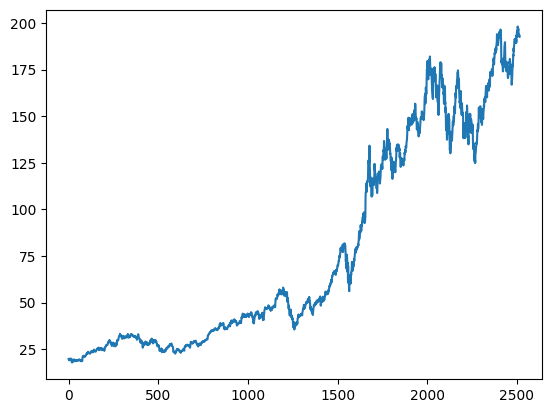

In [39]:
plt.plot(df.Close)

In [40]:
df

,Open,High,Low,Close,Volume
0,19.845715,19.893929,19.715000,19.754642,234684800
1,19.745001,19.775000,19.301071,19.320715,392467600
2,19.194643,19.528570,19.057142,19.426071,412610800
3,19.440001,19.498571,19.211430,19.287144,317209200
4,19.243214,19.484285,19.238930,19.409286,258529600
...,...,...,...,...,...
2511,195.179993,195.410004,192.970001,193.600006,37122800
2512,193.610001,193.889999,192.830002,193.050003,28919300
2513,192.490005,193.500000,191.089996,193.149994,48087700
2514,194.139999,194.660004,193.169998,193.580002,34049900


In [41]:
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2511    181.768301
2512    181.787101
2513    181.898701
2514    182.046001
2515    182.173301
Name: Close, Length: 2516, dtype: float64

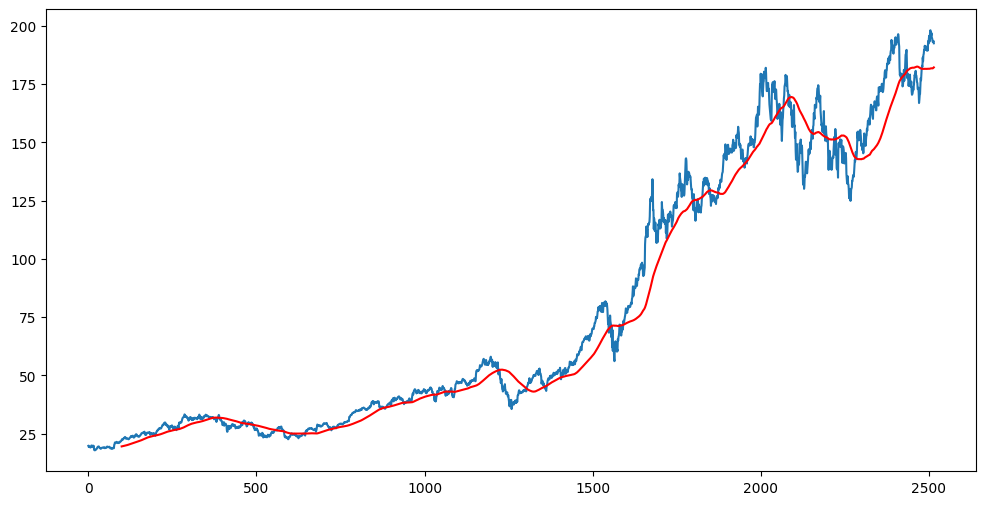

In [42]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [43]:
ma200 = df.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2511    178.649100
2512    178.871851
2513    179.085250
2514    179.290201
2515    179.487900
Name: Close, Length: 2516, dtype: float64

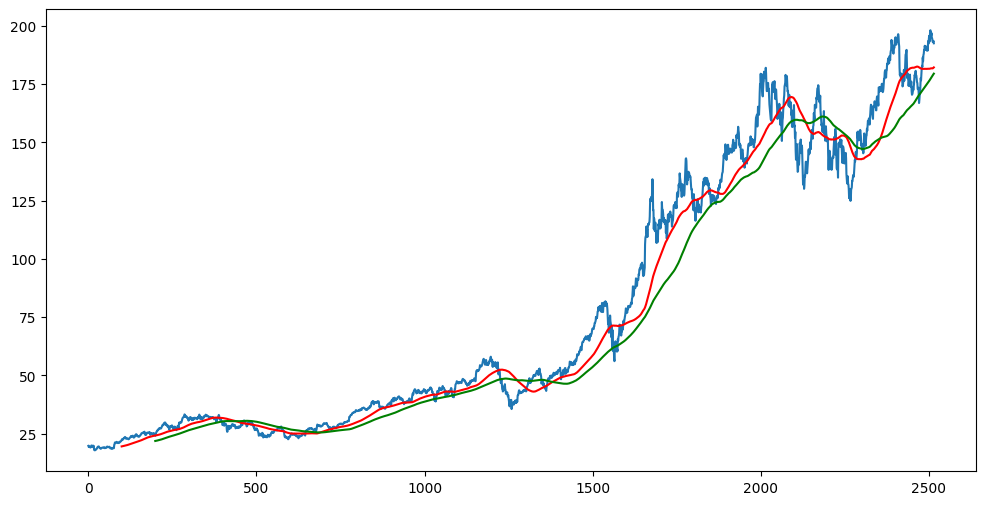

In [44]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [45]:
df.shape

(2516, 5)

In [46]:
# Splitting Data into Training and Testing
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1761, 1)
(755, 1)


In [47]:
data_training.head()

,Close
0,19.754642
1,19.320715
2,19.426071
3,19.287144
4,19.409286


In [48]:
data_testing.head()

,Close
1761,133.720001
1762,132.690002
1763,129.410004
1764,131.009995
1765,126.599998


In [49]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [50]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.01603287],
       [0.01238153],
       [0.01326806],
       ...,
       [0.96028296],
       [1.        ],
       [0.98468532]])

In [51]:
data_training_array.shape

(1761, 1)

In [52]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100 : i])
    y_train.append(data_training_array[i, 0])
    
x_train , y_train = np.array(x_train), np.array(y_train)

In [ ]:
# Machine learning model

In [23]:
pip install keras

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [24]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [56]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [57]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [58]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_9 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_10 (LSTM)                       │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_11 (LSTM)                       │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [59]:
model.compile(optimizer='adam' , loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 12s 123ms/step - loss: 0.0453
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 121ms/step - loss: 0.0046
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 121ms/step - loss: 0.0041
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 131ms/step - loss: 0.0040
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 178ms/step - loss: 0.0030
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 163ms/step - loss: 0.0031
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 160ms/step - loss: 0.0037
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 162ms/step - loss: 0.0036
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 174ms/step - loss: 0.0034
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 166ms/step - loss: 0.0027
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 168ms/step - loss: 0.0023
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 166ms/step - loss: 0.0024
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 172ms/step - loss: 0.0026
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 172ms/step - loss: 0.0028
Epoch 15/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 172ms/step - 

In [111]:
model.save('keras_model.keras')

In [112]:
data_testing.head()

,Close
1761,133.720001
1762,132.690002
1763,129.410004
1764,131.009995
1765,126.599998


In [113]:
data_training.tail(100)

,Close
1661,111.112503
1662,112.727501
1663,109.375000
1664,113.010002
1665,115.010002
...,...
1756,131.880005
1757,130.960007
1758,131.970001
1759,136.690002


In [114]:
past_100_days = data_training.tail(100)

In [115]:
final_df = pd.concat([past_100_days,data_testing], ignore_index=True)

In [116]:
final_df.head()

,Close
0,111.112503
1,112.727501
2,109.375000
3,113.010002
4,115.010002


In [117]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.04681173],
       [0.06450646],
       [0.02777477],
       [0.06760168],
       [0.08951469],
       [0.08839163],
       [0.08510465],
       [0.09556813],
       [0.09715679],
       [0.12528766],
       [0.19206755],
       [0.2083653 ],
       [0.1970527 ],
       [0.21565138],
       [0.19907971],
       [0.19686102],
       [0.24323431],
       [0.29955073],
       [0.26909167],
       [0.1538293 ],
       [0.15470584],
       [0.06551992],
       [0.11482418],
       [0.07286076],
       [0.05653559],
       [0.09334945],
       [0.09532162],
       [0.05795991],
       [0.03834776],
       [0.        ],
       [0.03549913],
       [0.05445383],
       [0.00306789],
       [0.01512003],
       [0.0596034 ],
       [0.08896683],
       [0.07943464],
       [0.09827984],
       [0.10901725],
       [0.06771119],
       [0.10583985],
       [0.06924517],
       [0.09028164],
       [0.08907642],
       [0.11098942],
       [0.19239623],
       [0.15623974],
       [0.157

In [118]:
input_data.shape

(855, 1)

In [119]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100 : i])
    y_test.append(input_data[i, 0])

In [120]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(755, 100, 1)
(755,)


In [121]:
 # Making Predictions
y_predicted = model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step


In [122]:
y_predicted.shape

(755, 1)

In [123]:
y_test

array([0.29451083, 0.28322565, 0.24728833, 0.26481864, 0.21650051,
       0.26383259, 0.27621349, 0.24257695, 0.24060486, 0.26350391,
       0.24181008, 0.22241703, 0.22997704, 0.27599432, 0.32902375,
       0.35312819, 0.39531062, 0.39794024, 0.38588802, 0.33143419,
       0.27522745, 0.29911254, 0.30842564, 0.29692128, 0.33472117,
       0.32781852, 0.3294621 , 0.31960115, 0.31280817, 0.30995954,
       0.31258899, 0.2887039 , 0.26295605, 0.25057532, 0.25232823,
       0.20992662, 0.20839272, 0.20280488, 0.15503452, 0.15799282,
       0.22953877, 0.20028493, 0.16675798, 0.14561192, 0.15974582,
       0.10430595, 0.15613016, 0.14396852, 0.16566234, 0.15547279,
       0.18790403, 0.20521532, 0.19634058, 0.14999454, 0.14407802,
       0.18133014, 0.17201713, 0.14517365, 0.1506519 , 0.15744497,
       0.15941714, 0.14309198, 0.16774411, 0.17705712, 0.20883099,
       0.21222748, 0.23074399, 0.25769698, 0.28662214, 0.26733875,
       0.30228985, 0.27599432, 0.30305689, 0.29933172, 0.30678

In [124]:
scaler.scale_

array([0.0109565])

In [125]:
scale_factor = 1/0.02123255
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

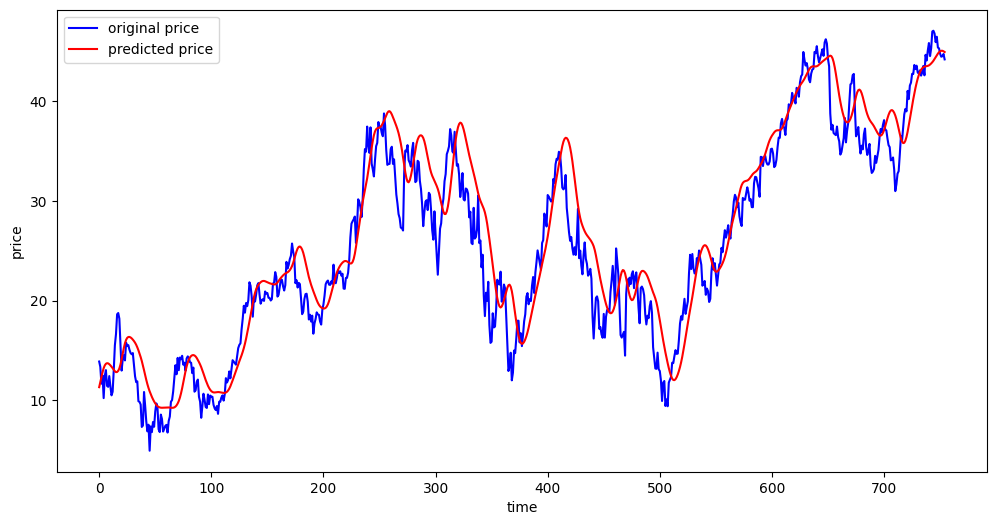

In [126]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "original price")
plt.plot(y_predicted, 'r', label = "predicted price")
plt.xlabel("time")
plt.ylabel("price")
plt.legend()
plt.show()